## Restaurent Food Cost Dataset

This dataset has  the information from diffrent restaurent with their special food,cuisines,timing,rating and votes.On which the cost is need to be predicted.I have collected this dataset from the github link(https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects).

So lets start the work.Importing numpy and pandas for data processing,matplotlib and seaborn for data visualisation and sklearn models to calculate metrics and other modelling techniques.

In [1]:
#importing the required libraries and metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#importing warnings to suppress when raised
import warnings
warnings.filterwarnings('ignore')

In [2]:
#accesing the dataset from the file folder
t1=pd.read_excel('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Restaurent/Data_Train.xlsx')
traindata=pd.DataFrame(t1)

t2=pd.read_excel('C:/Users/hp/Downloads/Data-Science-ML-Capstone-Projects-master/Restaurent/Data_Test.xlsx')
testdata=pd.DataFrame(t2)

In [3]:
#structure for both train data
traindata.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [4]:
#verifying for the null values in train data
traindata.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1204
COST                0
dtype: int64

In [5]:
#structure for the test data
testdata.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [6]:
testdata.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [7]:
#getting the shape of both datasets
print(traindata.shape)
print(testdata.shape)

(12690, 9)
(4231, 8)


In [8]:
#marking the dataset before concat
traindata['Data']='Train'
testdata['Data']='Test'

In [9]:
#Merging the datasets 
cost=pd.concat([traindata,testdata],ignore_index=True)
cost.head()

,CITY,COST,CUISINES,Data,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Train,Dombivali East,3.6,9438,"11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Train,Ramapuram,4.2,13198,6pm – 11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Train,Saligramam,3.8,10915,"11am – 3:30pm, 7pm – 11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Train,Bandra West,4.1,6346,11:30am – 1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Train,Lower Parel,3.8,15387,11am – 1am (Mon-Sun),DESSERT PARLOR,165 votes


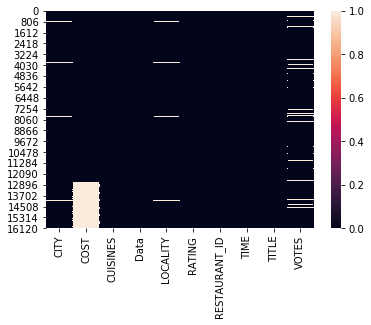

In [10]:
#plotting heatmap for null data
sns.heatmap(cost.isnull())

In [11]:
#checking the null values of concatenaed dataset
cost.isnull().sum()

CITY              147
COST             4231
CUISINES            0
Data                0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES            1606
dtype: int64

In [12]:
#getting the structural info of dataset
cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 10 columns):
CITY             16774 non-null object
COST             12690 non-null float64
CUISINES         16921 non-null object
Data             16921 non-null object
LOCALITY         16793 non-null object
RATING           16917 non-null object
RESTAURANT_ID    16921 non-null int64
TIME             16921 non-null object
TITLE            16921 non-null object
VOTES            15315 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB


In [13]:
#lets see the counts of unique values in each column
for col in cost.columns:
    print(cost[col].value_counts())

Chennai           2855
Bangalore         2835
Hyderabad         2458
Mumbai            2311
New Delhi         1754
                  ... 
OMR Karapakkam       1
Navi-Mumbai          1
RA Puram             1
Kerala 682022        1
Sector 1             1
Name: CITY, Length: 450, dtype: int64
300.0     1595
400.0     1357
500.0     1300
200.0     1031
600.0      806
          ... 
70.0         1
599.0        1
2900.0       1
8000.0       1
4050.0       1
Name: COST, Length: 86, dtype: int64
North Indian                                       716
North Indian, Chinese                              714
South Indian                                       706
Fast Food                                          364
Chinese                                            226
                                                  ... 
North Indian, South Indian, Hyderabadi, Mughlai      1
Arabian, Italian, Hyderabadi                         1
Fast Food, Sandwich, Burger, Beverages               1
Cafe, Health

In [14]:
#lets impute first for the null values
cost['CITY'].replace(np.NaN,'Unknown',inplace=True)
cost['LOCALITY'].replace(np.NaN,'Unknown',inplace=True)

In [15]:
#rating column has diffrent unknown data as it is seen from value_count,so lets take it seperately
cost['RATING'].value_counts()

#it shows the rating starts frpm 2.0 to 4.8,lets fill the unknown and null values from ratio

3.9    1643
3.8    1604
4.0    1498
3.7    1437
3.6    1261
4.1    1217
3.5     988
4.2     968
NEW     930
3.4     777
4.3     740
-       672
3.3     485
4.4     484
3.2     349
4.5     274
3.1     263
2.9     242
3.0     229
2.8     191
4.6     184
2.7     129
4.7      90
2.6      85
2.5      51
4.8      49
4.9      28
2.4      24
2.3      15
2.2       4
2.1       4
2.0       2
Name: RATING, dtype: int64

In [16]:
#replacing and adjusting the null values of rating column
cost['RATING'].replace('NEW',1.5,inplace=True)
cost["RATING"].replace('-',1.0,inplace=True)
cost["RATING"].fillna(0.5,inplace=True)

In [17]:
#As rating is in object datatype,so lets put it convert back to its numeric datatype
cost['RATING']=pd.to_numeric(cost['RATING'])

In [18]:
#votes column has also null values,so check the unique values here first
cost['VOTES'].unique()

array(['49 votes', '30 votes', '221 votes', ..., '2159 votes',
       '3807 votes', '1913 votes'], dtype=object)

In [19]:
#filling the null values
cost['VOTES'].fillna('0',inplace=True)

In [20]:
#lets remove the string prt from the votes column before compute it
cost['VOTES']=cost['VOTES'].str.split(' ').str[0]

#votes column is in the object datatype,lets convert it to int datatype
cost['VOTES']=cost['VOTES'].astype(int)

In [21]:
#lets check for null values again
cost.isnull().sum()

#we get the null values which is from test data,so no need to impute that

CITY                0
COST             4231
CUISINES            0
Data                0
LOCALITY            0
RATING              0
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES               0
dtype: int64

In [22]:
#lets check for datatypes
cost.dtypes

CITY              object
COST             float64
CUISINES          object
Data              object
LOCALITY          object
RATING           float64
RESTAURANT_ID      int64
TIME              object
TITLE             object
VOTES              int32
dtype: object

In [23]:
#lets remove the restaurent id,time and title for less complexity
cost.drop(['RESTAURANT_ID','TIME','TITLE'],axis=1,inplace=True)

In [24]:
#lets check for the value_counts of Cuisine column
cost['CUISINES'].value_counts()

North Indian                                       716
North Indian, Chinese                              714
South Indian                                       706
Fast Food                                          364
Chinese                                            226
                                                  ... 
North Indian, South Indian, Hyderabadi, Mughlai      1
Arabian, Italian, Hyderabadi                         1
Fast Food, Sandwich, Burger, Beverages               1
Cafe, Healthy Food, Salad, Beverages, Desserts       1
Street Food, North Indian, Mithai                    1
Name: CUISINES, Length: 5183, dtype: int64

In [25]:
#so every cuisine has some information,so lets extract the first three of them and seperate
cost['CUISINES1']=cost['CUISINES'].str.split(',').str[0]
cost['CUISINES2']=cost['CUISINES'].str.split(',').str[1]
cost['CUISINES3']=cost['CUISINES'].str.split(',').str[2]

In [26]:
#all of the cuisines have not the complete info upto three string,so there is chance of null data
cost['CUISINES2'].fillna('None',inplace=True)
cost['CUISINES3'].fillna('None',inplace=True)

In [27]:
#now lets drop the cuisine column
cost.drop('CUISINES',axis=1,inplace=True)

In [28]:
#Now converting the object datatype categorical data to label using labelEncoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

list=['CITY','LOCALITY','CUISINES1','CUISINES2','CUISINES3']
for val in list:
    cost[val]=le.fit_transform(cost[val].astype(str))

In [29]:
#lets look to the structure now
cost.head()

,CITY,COST,Data,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
0,400,1200.0,Train,328,3.6,49,61,32,71
1,75,1500.0,Train,1214,4.2,30,6,62,45
2,75,800.0,Train,1272,3.8,221,74,23,14
3,277,800.0,Train,161,4.1,24,102,23,100
4,277,300.0,Train,709,3.8,165,30,100,100


In [30]:
#lets seperate the train and test datset
final_train=cost.loc[cost['Data']=='Train']
final_test=cost.loc[cost['Data']=='Test']

In [31]:
#lets drop the marking column from both
final_train.drop('Data',axis=1,inplace=True)
final_test.drop(['Data','COST'],axis=1,inplace=True)

Data Visualization

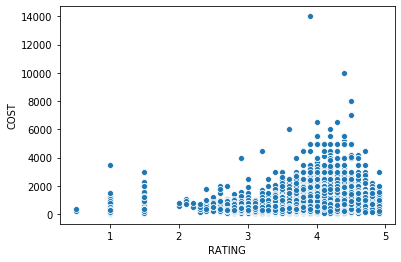

In [32]:
#plotting scatterplot for rating and cost
sns.scatterplot(x='RATING',y='COST',data=final_train)

#It shows with an increase in rating,cost increases

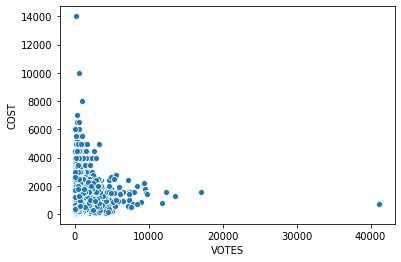

In [33]:
#plotting scatterplot for rating and cost
sns.scatterplot(x='VOTES',y='COST',data=final_train)

#It shows there is concentration on the origin point of both parameters,some outliers are also here

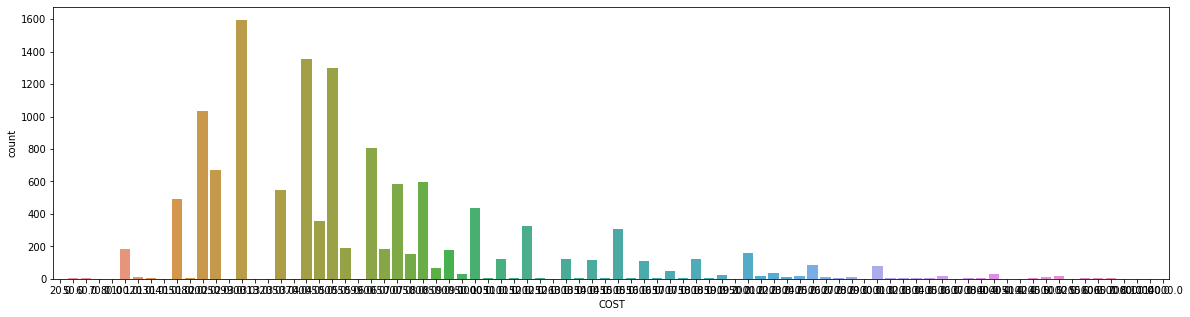

In [34]:
#plotting the countplot for cost
plt.figure(figsize=(20,5))
sns.countplot(final_train['COST'])

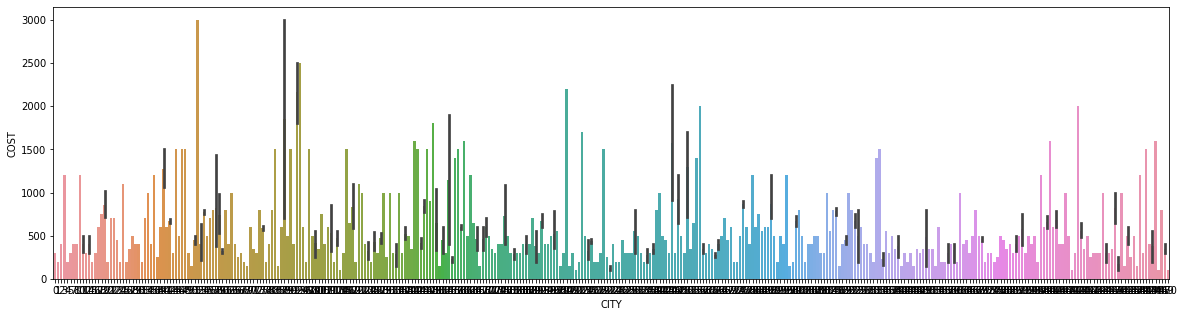

In [35]:
plt.figure(figsize=(20,5))
sns.barplot(x='CITY',y='COST',data=final_train)

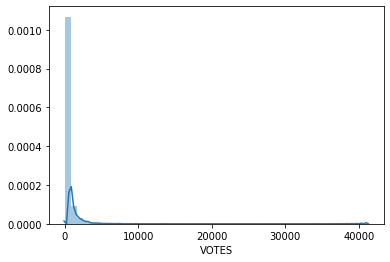

In [36]:
#plotting the distplot for votes column
sns.distplot(final_train['VOTES'])

#this column needs to be adjust as it show skewed data

In [37]:
#correlation among the data
final_train.corr()

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
CITY,1.000000,0.040400,0.061286,-0.044629,0.037076,0.012848,0.006632,-0.002434
COST,0.040400,1.000000,-0.017973,0.271111,0.257231,-0.036211,-0.077254,-0.172412
LOCALITY,0.061286,-0.017973,1.000000,-0.023081,-0.032825,0.017911,0.020809,0.013807
RATING,-0.044629,0.271111,-0.023081,1.000000,0.296109,-0.032600,-0.102557,-0.130764
VOTES,0.037076,0.257231,-0.032825,0.296109,1.000000,-0.039959,-0.086407,-0.148303
CUISINES1,0.012848,-0.036211,0.017911,-0.032600,-0.039959,1.000000,0.038284,-0.018745
CUISINES2,0.006632,-0.077254,0.020809,-0.102557,-0.086407,0.038284,1.000000,0.262384
CUISINES3,-0.002434,-0.172412,0.013807,-0.130764,-0.148303,-0.018745,0.262384,1.000000


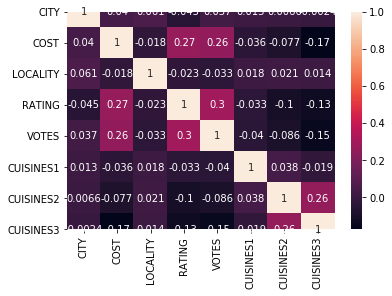

In [38]:
#correlation heatmap
sns.heatmap(final_train.corr(),annot=True)

Statistical summary for the data

In [39]:
#describing the data
final_train.describe()

,CITY,COST,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
count,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000,12690.000000
mean,177.703546,655.252246,761.607644,3.548952,376.231127,50.898660,56.876753,74.285658
std,109.302452,627.003540,463.036069,0.837089,810.946942,28.980787,33.380854,33.651053
min,0.000000,20.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,300.000000,389.000000,3.400000,39.250000,27.000000,23.000000,41.000000
50%,160.000000,500.000000,674.000000,3.800000,132.000000,50.000000,63.000000,100.000000
75%,277.000000,800.000000,1174.000000,4.000000,405.000000,74.000000,95.000000,100.000000
max,450.000000,14000.000000,1636.000000,4.900000,41186.000000,105.000000,100.000000,100.000000


There is a uneven data needs to adjust votes and cost column,and zscore for some of the other column.There is some diffrence in mean,median and min-max on the data features.

In [40]:
#Applying boxcox to votes and cost column
#Votes column need more values to be computed,so lets increase it by adding 5.
final_train['VOTES']=final_train['VOTES']+5
from scipy.stats import boxcox
final_train['VOTES']=boxcox(final_train['VOTES'],0)
final_train['COST']=boxcox(final_train['COST'],0)

In [41]:
#importing zscore to handle outliers
from scipy.stats import zscore
z=np.abs(zscore(final_train))
final_train_new=final_train[(z<3).all(axis=1)]
final_train_new.shape

(12142, 8)

In [43]:
#checking for the skew in data
final_train.skew()

CITY         0.265771
COST         0.392350
LOCALITY     0.338724
RATING      -1.770244
VOTES       -0.256517
CUISINES1   -0.006533
CUISINES2    0.044002
CUISINES3   -0.820207
dtype: float64

In [44]:
#handling skew data in respective columns
list=['RATING','CUISINES3']
final_train[list]=np.square(final_train[list])

In [45]:
#There is a diffrence OF 600 rows in dataset shape after applying zscore,so taking modified one as the prime dataset
final_train=final_train_new

Now shaping the data for machine learning process

In [46]:
def_x=final_train.drop('COST',axis=1)
y=final_train['COST']

In [47]:
def_x

,CITY,LOCALITY,RATING,VOTES,CUISINES1,CUISINES2,CUISINES3
0,400,328,3.6,3.988984,61,32,71
1,75,1214,4.2,3.555348,6,62,45
2,75,1272,3.8,5.420535,74,23,14
3,277,161,4.1,3.367296,102,23,100
4,277,709,3.8,5.135798,30,100,100
...,...,...,...,...,...,...,...
12685,160,395,3.8,6.311735,74,17,48
12686,277,158,4.3,7.105786,39,25,100
12687,300,1549,4.0,6.418365,36,25,5
12688,75,720,3.5,3.610918,74,86,23


In [48]:
#applying standard scaler to the input variables to scale in same params
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(def_x)
x=pd.DataFrame(x,columns=def_x.columns)

In [49]:
#creating function for determining random state
def random(alg):
    r_state=0
    for r_score in range(43,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=r_score)
        alg.fit(x_train,y_train)
        pred=alg.predict(x_test)
        r2scr=r2_score(y_test,pred)
        if r2scr > r_state:
            r_state=r2scr
            final_r=r_score
    print(r2scr,'at',final_r)

In [50]:
#creating the function for algorithm operations
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    print('mean_squared_error=',mean_squared_error(y_test,pred))
    print('mean_absolute_error=',mean_absolute_error(y_test,pred))
    print('r2_score=',r2_score(y_test,pred))
    print('root_mean_squared_error=',np.sqrt(mean_squared_error(y_test,pred)))

In [51]:
#function for cross_val score 
def cross_val(alg):
    score=cross_val_score(alg,x,y,cv=5)
    print(score)
    print('mean_score=',score.mean())
    print('standard deviation',score.std())

lets start to apply algorithm one by one.

Linear Regression

In [52]:
# using Linear regression
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
random(lm)

0.23390294745922535 at 100


In [53]:
cross_val(lm)

[0.21996857 0.22555522 0.2300626  0.21270414 0.21720421]
mean_score= 0.22109894937568128
standard deviation 0.006117597068849354


Decision Tree Regressor

In [54]:
#applying Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
random(dtr)

-0.013912123268965848 at 70


In [55]:
cross_val(dtr)

[-0.07290043 -0.02428067 -0.00295842 -0.07761973 -0.04516729]
mean_score= -0.044585304453385446
standard deviation 0.02841983039206986


K-Neighbors

In [56]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()

#getting the best neighbors using GridSearchCV
parameters={'n_neighbors':range(1,40)}
grid=GridSearchCV(knr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_neighbors': 26}

In [57]:
knr=KNeighborsRegressor(n_neighbors=26)
random(knr)

0.3231034150949028 at 86


In [58]:
cross_val(knr)

[0.30758188 0.31622063 0.32373382 0.31414667 0.31146822]
mean_score= 0.3146302425363932
standard deviation 0.00539102926754141


Random Forest

In [59]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

#getting the best params using GridsearchCV
parameters={'n_estimators':[10,100,500]}
grid=GridSearchCV(rfr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 500}

In [60]:
rfr=RandomForestRegressor(n_estimators=500)
random(rfr)

0.47852691938932335 at 95


In [61]:
cross_val(rfr)

[0.47678191 0.47964344 0.49697717 0.47862146 0.47725743]
mean_score= 0.4818562819458072
standard deviation 0.007627588715629243


In [62]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()

#getting the best params
parameters={'learning_rate':[1,0.1,0.01,0.001],'n_estimators':[10,100,500]}
grid=GridSearchCV(gbr,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [63]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
random(gbr)

0.5915383234087109 at 67


In [64]:
cross_val(gbr)

[0.57845202 0.56657192 0.58358409 0.57051804 0.58202367]
mean_score= 0.576229949009318
standard deviation 0.006610468332913972


From the above solved algorithms,I get the best score of 0.59 at the random_state of 67 from gradient Boosting classifier.So I am taking it as a final algorithm for this dataset.

In [65]:
#solving for the metrics from best chosen algorithm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=67)
model(gbr)

mean_squared_error= 0.2020214103669461
mean_absolute_error= 0.3445089343207353
r2_score= 0.591753232472185
root_mean_squared_error= 0.449467919174379


In [66]:
#now applying the algorithm to test data
test_cost_pred=gbr.predict(final_test)

In [67]:
#storing as dataFrame
test_cost_pred=pd.DataFrame(test_cost_pred,columns=["cost"])

#Storing results as csv
test_cost_pred.to_csv("foodcost_predictions.csv",index=False)

In [68]:
#saving the model
from sklearn.externals import joblib
joblib.dump(gbr,'gbr_foodcost.pkl')

['gbr_foodcost.pkl']

## Conclusion

After importing the dataset from both train and test files,I checked for the shape of trhe data and null values.Then i concat them both and impute each column one by one to replace the unwanted term and managing null values.Then i plots the data from diffrent prospects to get the data insights and correlation map too.I dropped some of the unnecessary column such as title,time and restaurent ID to remove the complexity.After checking the statistical summary,I applied zscore to reduce the outliers.Then operate some skewed values also.

After the complete data processing,I shape the data for machine modelling and applied standard scaler also to scale the data.On applying to various algorithm,I get the best fit algorithm as Gradient Boosting Regressor.